<a href="https://colab.research.google.com/github/cristian0527/MATH-383/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

This jupyter notebook provides a starting point for you to work on the ego network assignment from class on 1/30. You will likely find it useful to reference code from the other notebooks on Moodle. Once you have completed your analysis please print (or otherwise export) the notebook to .pdf to submit through Moodle.

**Bonus points will be awarded for the best visualization(s)!**

## Load packages
The cell below loads the networkx package that you'll need for building, evaluating, and visualizing your ego network.

In [ ]:
import networkx as nx

The cell below creates an empty graph object called my_ego_network for you to start from and then adds a single node to represent you. I recommend that you change the name of the initial node before going on to build up your network.

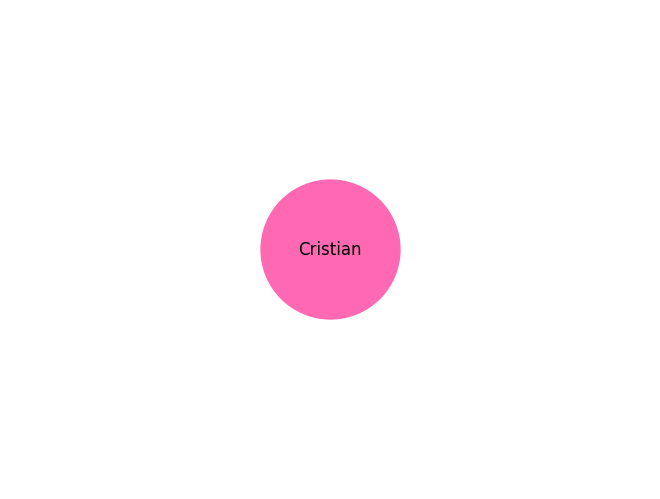

In [ ]:
my_ego_network = nx.Graph()

my_ego_network.add_node('Cristian')

nx.draw(my_ego_network,with_labels=True,node_size=10000,node_color='hotpink')

## Building Ego Network

You can start building and analyzing your ego network in the cell below:


In [ ]:
my_ego_network.add_nodes_from(['Zey','Aqib','Joaquin', 'Ali', 'Luz', 'Classmate'])
my_ego_network.add_edge('Cristian','Zey')
my_ego_network.add_edge('Cristian','Aqib')
my_ego_network.add_edge('Cristian','Joaquin')
my_ego_network.add_edge('Cristian','Ali')
my_ego_network.add_edge('Cristian','Luz')

In [ ]:
my_ego_network.add_nodes_from(['Luz','Aqib','Joaquin', 'Ali', 'Zey', 'Classmate'])
my_ego_network.add_edges_from([
    ('Cristian','Luz'),
    ('Cristian','Aqib'),
    ('Cristian','Joaquin'),
    ('Cristian','Ali'),
    ('Cristian','Zey'),
    ('Cristian','Classmate')
])

my_ego_network.add_edges_from([
    ('Zey','Ali'),
    ('Aqib','Ali'),
    ('Aqib', 'Joaquin'),
    ('Ali','Joaquin')
])

In [ ]:
my_ego_network.nodes['Cristian']['Age']=20
my_ego_network.nodes['Aqib']['Age']=19
my_ego_network.nodes['Luz']['Age']=19
my_ego_network.nodes['Ali']['Age']=21
my_ego_network.nodes['Zey']['Age']=22
my_ego_network.nodes['Joaquin']['Age']=19
my_ego_network.nodes['Classmate']['Age']=19

my_ego_network.nodes['Cristian']['ClassYear']='Junior'
my_ego_network.nodes['Aqib']['ClassYear']='Sophomore'
my_ego_network.nodes['Luz']['ClassYear']='Sophomore'
my_ego_network.nodes['Ali']['ClassYear']='Junior'
my_ego_network.nodes['Zey']['ClassYear']='Senior'
my_ego_network.nodes['Joaquin']['ClassYear']='Sophomore'
my_ego_network.nodes['Classmate']['ClassYear']='Junior'

## Visualization of Ego Network

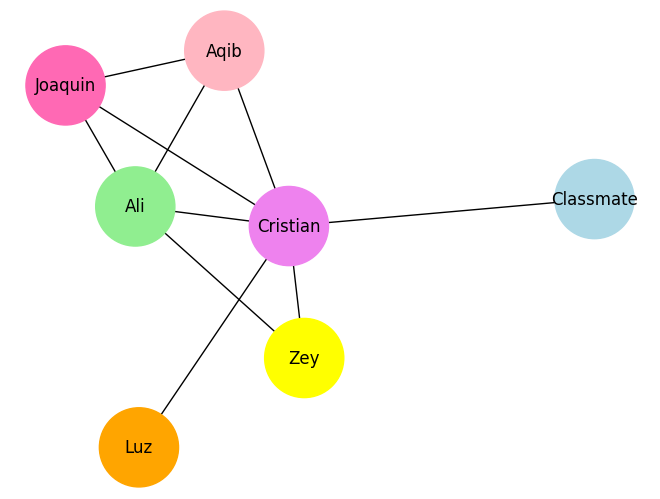

In [ ]:
# nx.draw(my_ego_network,with_labels=True, node_size=2500)
color_dictionary = {'Cristian':'violet','Classmate':'lightblue','Ali':'lightgreen','Joaquin':'hotpink','Luz':'orange','Zey':'yellow', 'Aqib':'lightpink'}
nx.draw(my_ego_network,with_labels=True, node_size=3250,node_color = [color_dictionary[name] for name in my_ego_network.nodes()])

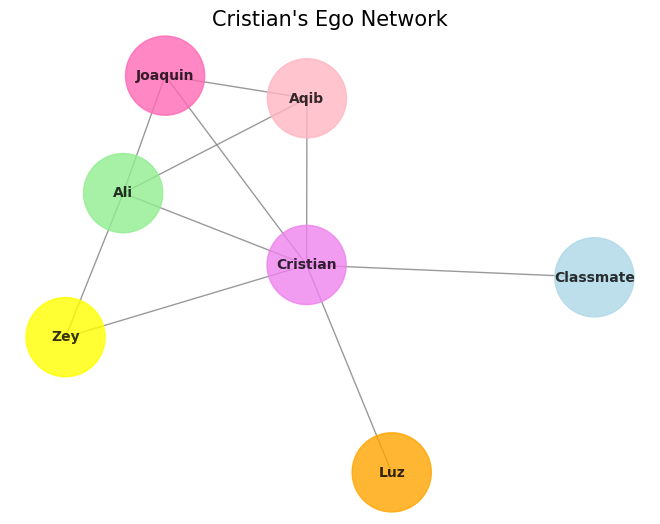

In [ ]:
#Visualization with the assistance of Gemini; asked for a more visually appearing model
color_dictionary = {'Cristian':'violet','Classmate':'lightblue','Ali':'lightgreen','Joaquin':'hotpink','Luz':'orange','Zey':'yellow', 'Aqib':'lightpink'}

pos = nx.spring_layout(my_ego_network, k=0.5, iterations=50) # Use a spring layout for better node placement

nx.draw(
    my_ego_network,
    pos,
    with_labels=True,
    node_size=3250,
    node_color=[color_dictionary[node] for node in my_ego_network.nodes()],
    font_size=10,
    font_weight='bold',
    edge_color='gray',
    width=1,
    alpha=0.8
)

import matplotlib.pyplot as plt
plt.title("Cristian's Ego Network", size=15)
plt.axis('off')
plt.show()

##  Centrality Measures

##### Eigenvector Centrality & Degree Centrality

Looking at my ego network, when looking at the plot, it makes sense as why I have the brigthest color/biggest size because this ego network is centered on myself. Of course I will be the most influential since I am the bridge/focal point.

Ali, Aqib, and Joaquin (primarily Ali) have to, to some extent, a bit influence over this, with their EV centrality scores being 0.41 (Joaquin & Aqib) and 0.477 (Ali). This is mainly because of the fact they know me, and each other, and I am most connected to other nodes in the network.

Suppose I was treated as a null node, Aqib, Joaquin, and Ali would still have high EV Centrality scores because they form a triangle.



In [ ]:
cristian_degrees = nx.degree_centrality(my_ego_network)
cristian_eigens = nx.eigenvector_centrality(my_ego_network)

Degree Centrality:
Cristian: 1.0
Zey: 0.3333333333333333
Aqib: 0.5
Joaquin: 0.5
Ali: 0.6666666666666666
Luz: 0.16666666666666666
Classmate: 0.16666666666666666

Eigenvector Centrality:
Cristian: 0.5466723234092665
Zey: 0.29345912286365006
Aqib: 0.41142407124768304
Joaquin: 0.41142407124768304
Ali: 0.4768164053549296
Luz: 0.15674453229184382
Classmate: 0.15674453229184382


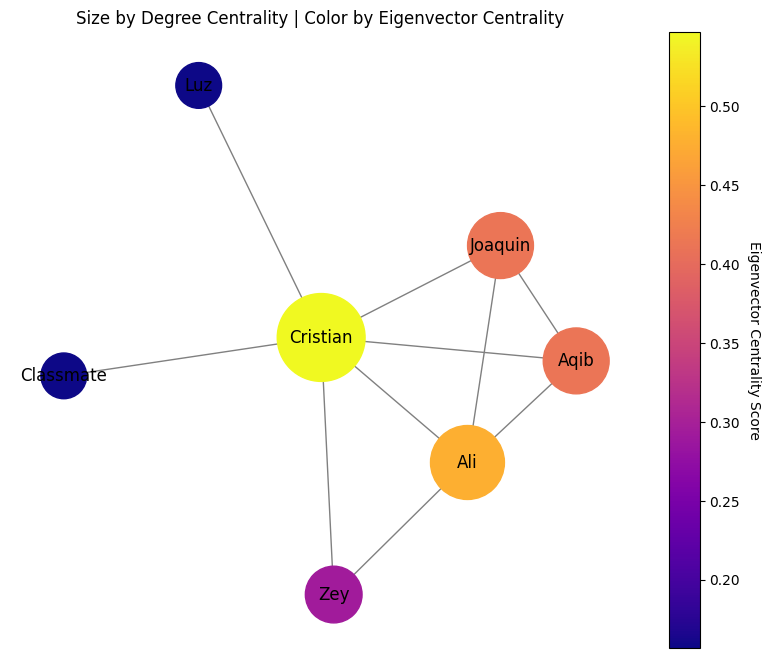

In [ ]:
# Observing Centrality Scores
print("Degree Centrality:")
for node in cristian_degrees:
    print(f"{node}: {cristian_degrees[node]}")

print("\nEigenvector Centrality:")
for node in cristian_eigens:
    print(f"{node}: {cristian_eigens[node]}")

node_sizes = [v * 3500 + 500 for v in cristian_degrees.values()]
node_colors = list(cristian_eigens.values())

plt.figure(figsize=(10, 8))

# Draw the edges and labels first
pos = nx.spring_layout(my_ego_network) # Position nodes so labels & edges line up
nx.draw_networkx_edges(my_ego_network, pos, edge_color='gray')
nx.draw_networkx_labels(my_ego_network, pos, font_weight='medium')

nodes = nx.draw_networkx_nodes(
    my_ego_network,
    pos,
    node_size=node_sizes,
    node_color=node_colors,
    cmap=plt.cm.plasma
)

# colorbar using nodes variable (asked Gemini)
cbar = plt.colorbar(nodes)
cbar.set_label('Eigenvector Centrality Score', rotation=270, labelpad=15)

plt.title("Size by Degree Centrality | Color by Eigenvector Centrality")
plt.axis('off')
plt.show()

## Detaching myself from the ego network

Once I detached myself from the ego network that consists of my friends + a classmate, the ego network became disconnected. Since I was the center of ego network, once I disappeared, the network lost its connectivity feature; my friend Luz and my classmate have no social ties with this network, with only my friends (Degree Centrality of 0 for both). Additionally, with myself out of the picture, my friend Ali became the center node for this new network. Ali is the most popular among the connected nodes (Degree Centrality of 0.6) and the most influential since he is the only person connected to my friend Zey (Ali's EV Centrality Score of about 0.612). Hence, Ali is the secondary hub.

Ego network still connected? False 

Degree Centrality:
Zey: 0.2
Aqib: 0.4
Joaquin: 0.4
Ali: 0.6000000000000001
Luz: 0.0
Classmate: 0.0

Eigenvector Centrality:
Zey: 0.28184664735759
Aqib: 0.522720071488232
Joaquin: 0.522720071488232
Ali: 0.6116289079988876
Luz: 1.579489577304788e-07
Classmate: 1.579489577304788e-07


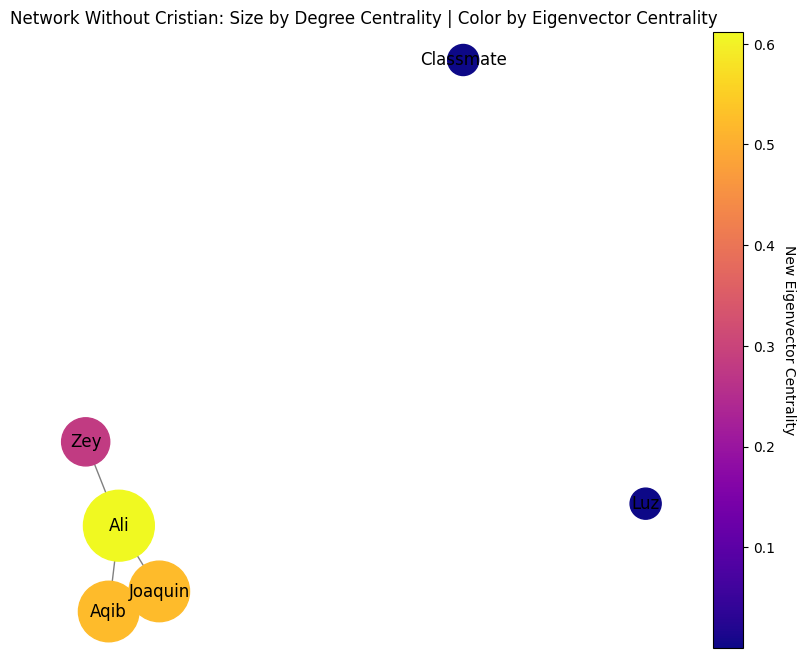

In [ ]:
minus_network = my_ego_network.copy()
minus_network.remove_node('Cristian')

# Recompute Centrality Scores
minus_degrees = nx.degree_centrality(minus_network)
minus_eigens = nx.eigenvector_centrality(minus_network)

# Connectivity
is_connected = nx.is_connected(minus_network)
print(f"Ego network still connected? {is_connected} \n")

# Observing Centrality Scores
print("Degree Centrality:")
for node in minus_degrees:
    print(f"{node}: {minus_degrees[node]}")

print("\nEigenvector Centrality:")
for node in minus_eigens:
    print(f"{node}: {minus_eigens[node]}")

plt.figure(figsize=(10, 8))
pos_alt = nx.spring_layout(minus_network)

minus_nodes = nx.draw_networkx_nodes(
    minus_network,
    pos_alt,
    node_size=[v * 3500 + 500 for v in minus_degrees.values()],
    node_color=list(minus_eigens.values()),
    cmap=plt.cm.plasma
)

nx.draw_networkx_edges(minus_network, pos_alt, edge_color='gray')
nx.draw_networkx_labels(minus_network, pos_alt, font_weight='medium')

cbar = plt.colorbar(minus_nodes)
cbar.set_label('New Eigenvector Centrality', rotation=270, labelpad=15)

plt.title("Network Without Cristian: Size by Degree Centrality | Color by Eigenvector Centrality")
plt.axis('off')
plt.show()